In [28]:
import nltk
import re
from string import digits
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Research question: how does lock down change people's perception of remote working
dataset: twitter dataset with key words: #remotework, #workfromhome, #wfh

In [24]:
# load remote work twitter dataset
df = pd.read_csv('cleaned_twitter_remotework.csv').dropna().reset_index()

Looking at stay at home order across different states, most of the enforced order were initialized during 2020, 03 to 2020, 05. I wana see how people perceive remote work befor lockdown, during lockdown and after lockdown, whether there are any differences. Following are the topic model for each period

In [25]:
# split dataset with three time period: pre lockdown, during lockdown and after lockdown
from pandas import Timestamp
df['created_at']= df['created_at'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S%z"))
df['date'] = df['created_at'].apply(lambda x: x.date())
df['year'] = df['created_at'].apply(lambda x: x.year)
df['month'] = df['created_at'].apply(lambda x: x.month)
df_pre_lockdown = df[df['created_at'] < Timestamp('2020-3-01 00:00:00+0000', tz='UTC')].reset_index(drop = True)
df_du_lockdown = df[(df['created_at'] > Timestamp('2020-3-01 00:00:00+0000', tz='UTC'))&(df['created_at'] < Timestamp('2020-6-01 00:00:00+0000', tz='UTC'))].reset_index(drop = True)
df_after_lockdown =df[df['created_at'] > Timestamp('2020-6-01 00:00:00+0000', tz='UTC')].reset_index(drop = True)

As mentioned by Professor Song, each tweet is too short to cover multiple topics, so I merged tweets by date.

In [34]:
df_pre_agg = df_pre_lockdown.groupby(['year','month','date'])['lematize_text'].apply(lambda x: ', '.join(x)).reset_index()
# topic model for pre_lockdown tweets
import gensim
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim.corpora as corpora
def sent_to_words(sentences):
    '''
    tokenize words
    '''
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(df_pre_agg['lematize_text'].values.tolist()))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                      update_every=1,
                                      chunksize=100,
                                      passes=10,
                                      alpha='auto')
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/yanshi/opt/anaconda3/lib/python

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.005068 -0.089444       1        1  70.900944
1      0.005068  0.089444       2        1  29.099056, topic_info=           Term        Freq       Total Category  logprob  loglift
441   affiliate  186.000000  186.000000  Default  30.0000  30.0000
11     business  349.000000  349.000000  Default  29.0000  29.0000
171       start  137.000000  137.000000  Default  28.0000  28.0000
470        free  127.000000  127.000000  Default  27.0000  27.0000
640   marketing  108.000000  108.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
837       world   31.545504   53.905921   Topic2  -5.8095   0.6987
137        work   38.293310  410.438862   Topic2  -5.6156  -1.1375
156       great   33.307117  106.344999   Topic2  -5.7551   0.0735
779      friend   31.394628   58.244688   Topic2  -5.8142   0.6164
2443     family   31.338217   57.271630   Topic2  -5.8160   0.6315

[156 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
4437      1  0.875158  accountability
4437      2  0.120334  accountability
441       2  0.996169       affiliate
142       1  0.881160             amp
142       2  0.117029             amp
...     ...       ...             ...
137       2  0.092584            work
256       1  0.888546         working
256       2  0.113916         working
837       1  0.408118           world
837       2  0.593627           world

[192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

I tried different number of topics and found out that 2 topics are the easiest to interpret with lambda around 0.5: topic 1 is related to how entreprenteur can utilize and benefit from remote work and topic 2 is how business in general can utilize remote work

In [38]:
df_pre_agg = df_du_lockdown.groupby(['year','month','date'])['lematize_text'].apply(lambda x: ', '.join(x)).reset_index()
# topic model for pre_lockdown tweets
data_words = list(sent_to_words(df_du_agg['lematize_text'].values.tolist()))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                      update_every=1,
                                      chunksize=100,
                                      passes=10,
                                      alpha='auto')
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x        y  topics  cluster       Freq
topic                                               
0     -0.008977  0.02834       1        1  63.717567
1      0.008977 -0.02834       2        1  36.282433, topic_info=                  Term         Freq        Total Category  logprob  loglift
9910          stayhome   467.000000   467.000000  Default  30.0000  30.0000
11728             work  1271.000000  1271.000000  Default  29.0000  29.0000
11694  womeninbusiness    84.000000    84.000000  Default  28.0000  28.0000
322                amp   660.000000   660.000000  Default  27.0000  27.0000
11698      womenintech    96.000000    96.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
6247              make    95.423179   297.761646   Topic2  -6.0606  -0.1241
1421        california    82.106956   235.121985   Topic2  -6.2109  -0.0382
10340             team    89.279845   276.298428   Topic2  -6.1272  -0.1159
2279       coronavirus   114.662097   460.646538   Topic2  -5.8770  -0.3768
6746           morning    80.559544   244.465575   Topic2  -6.2300  -0.0962

[197 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
15         1  0.888384         ability
15         2  0.102506         ability
313        1  0.944752         america
313        2  0.059047         america
322        1  0.637372             amp
...      ...       ...             ...
11905      2  0.447994            york
11962      1  0.596084            zoom
11962      2  0.404076            zoom
18054      1  0.143494  zoombackground
18054      2  0.860961  zoombackground

[244 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

During the lockdown, most people were talking about remote work in general, like how they conduct remote work; some people mentioned the benefits of remote work, especially for mother and women

In [41]:
df_af_agg = df_after_lockdown.groupby(['year','month','date'])['lematize_text'].apply(lambda x: ', '.join(x)).reset_index()
data_words = list(sent_to_words(df_af_agg['lematize_text'].values.tolist()))
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, 
                                       random_state=100,
                                      update_every=1,
                                      chunksize=100,
                                      passes=10,
                                      alpha='auto')
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/Users/yanshi/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.041425  0.130769       1        1  95.269085
0      0.041425 -0.130769       2        1   4.730915, topic_info=                Term        Freq       Total Category  logprob  loglift
308         remotely  142.000000  142.000000  Default  30.0000  30.0000
1579        keweenaw   65.000000   65.000000  Default  29.0000  29.0000
1908           place  138.000000  138.000000  Default  28.0000  28.0000
1            ability   67.000000   67.000000  Default  27.0000  27.0000
1165         twitter   71.000000   71.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
2877            site    7.298125   35.398682   Topic2  -6.9143   1.4720
1908           place    9.142266  138.823026   Topic2  -6.6890   0.3308
1262  cryptocurrency    6.001369   16.522279   Topic2  -7.1099   2.0383
4905          tiktok    6.738515   56.668657   Topic2  -6.9941   0.9217
79           country    6.538748   49.122058   Topic2  -7.0241   1.0345

[121 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
1          1  0.795346     ability
1          2  0.191472     ability
23927      1  0.141251       aejmc
23927      2  0.847507       aejmc
462        1  0.963524     amazing
...      ...       ...         ...
445        1  1.000285  workingmom
897        1  1.000237        year
646        1  0.976155         yes
646        2  0.026147         yes
453        1  0.998433        zoom

[171 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

Here you can find out that people's perceptions towards remote work are slowly merging, indicating a collective perceptions and emotiongs are forming. Topic 1 contains 95% of the token (text content), while topic 2 only covers 5%. Meanwhile, topic 1 includes some clear positive emotions such as love, like, suggesting public reached a collective positive emotions towards remote work. 

Lets looks at states with enforced stay at home order, California; and states with shelter in place, Texas

In [42]:
# load top 12 states with most remote work twitters, date of stay at home order and whether enforced order
dfs = pd.read_excel('states stay at home order timeline.xlsx', engine='openpyxl')
# filter twiteers based on 12 states
data = df[df['states_abbrev'].isin(dfs['states_abbrev'])]
df2 = []
for x in dfs.index:
    df2.append(data.loc[data['states_abbrev'] == dfs['states_abbrev'][x]])    

In [44]:
# generate new dataframe
df1 = pd.concat(df2)
df1 = df1.reset_index(drop = True)

In [45]:
# map stay at home order date
start_dict = dict(zip(dfs['states_abbrev'], dfs['start']))
end_dict = dict(zip(dfs['states_abbrev'], dfs['end']))
df1['start'] = df1['states_abbrev'].map(start_dict)
df1['end'] = df1['states_abbrev'].map(end_dict)

In [46]:
# map enforced or mild stay at home order
df1['lockdown'] = df1.apply(lambda x: 1 if (x['start'] < x['date'])&(x['end']>x['date']) else 0, axis =1 )
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
stay_at_home = dict(zip(dfs['states_abbrev'], dfs['Enforced_stay_at_home_order']))
df1['enforced_order'] = df1['states_abbrev'].map(stay_at_home)
df1['enforced_order'] = df1['enforced_order'].apply(lambda x: 1 if x == 'Y' else 0)

/var/folders/yn/83gzh79s0dv70yn_zgdzgg7m0000gn/T/ipykernel_14272/439337444.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df1['lockdown'] = df1.apply(lambda x: 1 if (x['start'] < x['date'])&(x['end']>x['date']) else 0, axis =1 )


In [101]:
# create year and month column for data aggragation
import time
import datetime
df1['year'] = df1['created_at'].apply(lambda x: x.year)
df1['month'] = df1['created_at'].apply(lambda x: x.month)

In [129]:
# filter two states
df_ca = df1[df1['states_abbrev'] == 'CA'].drop(columns = ['Unnamed: 0', 'index'])
df_ca['tweets'] = 1
df_tx = df1[df1['states_abbrev'] == 'TX'].drop(columns = ['Unnamed: 0', 'index'])
df_tx['tweets'] = 1

In [130]:
# aggregate data in month
df_ca['date'] = pd.to_datetime(df_ca['date'], errors='coerce')
per = df_ca.date.dt.to_period("M")
df_agg_ca = df_ca.groupby(per).sum()
df_agg_ca['date'] = df_agg_ca.index
df_agg_ca['state'] = 'CA'
df_agg_ca = df_agg_ca.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])
df_tx['date'] = pd.to_datetime(df_tx['date'], errors='coerce')
per = df_tx.date.dt.to_period("M")
df_agg_tx = df_tx.groupby(per).sum()
df_agg_tx['date'] = df_agg_tx.index
df_agg_tx['state'] = 'TX'
df_agg_tx = df_agg_tx.reset_index(drop = True).drop(columns = ['year', 'month', 'author_id', 'author_followers', 'author_tweets'])

In [131]:
# concat aggregate data
frames = [df_agg_ca, df_agg_tx]
result = pd.concat(frames).reset_index()
result['lockdown'] = result['lockdown'].apply(lambda x: 'Y' if x >0 else 'N')
result['enforced_order'] = result['enforced_order'].apply(lambda x: 'Y' if x >0 else 'N')
result

,index,retweets,replies,likes,quote_count,lockdown,enforced_order,tweets,date,state
0,0,100.0,9.0,274.0,12.0,N,Y,27,2019-03,CA
1,1,5.0,2.0,50.0,0.0,N,Y,29,2019-04,CA
2,2,4.0,2.0,27.0,0.0,N,Y,23,2019-05,CA
3,3,3.0,0.0,12.0,0.0,N,Y,13,2019-06,CA
4,4,10.0,14.0,102.0,2.0,N,Y,29,2019-07,CA
...,...,...,...,...,...,...,...,...,...,...
79,37,39.0,9.0,208.0,3.0,N,N,21,2022-06,TX
80,38,27.0,2.0,49.0,0.0,N,N,15,2022-07,TX
81,39,11.0,8.0,96.0,0.0,N,N,18,2022-08,TX
82,40,7.0,4.0,59.0,0.0,N,N,10,2022-09,TX


<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='date', ylabel='tweets'>

Text(0.5, 1.0, 'Monthly remote working tweet by state')

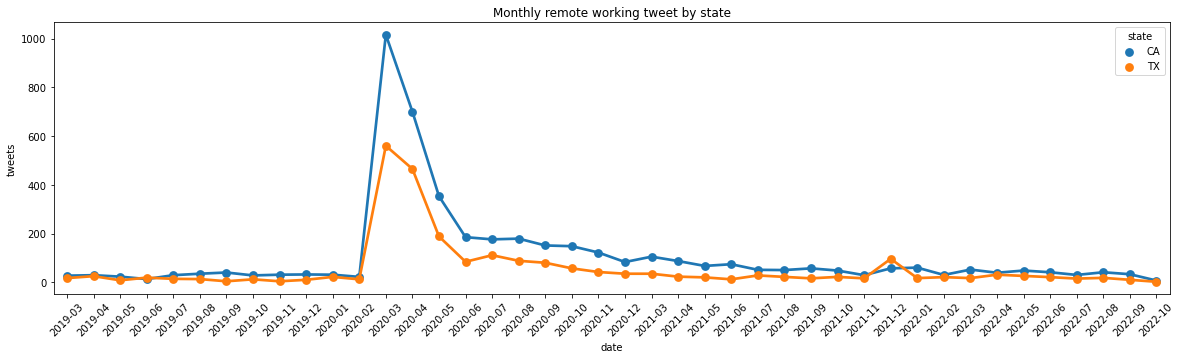

In [132]:
plt.figure(figsize=(20,5))
sns.pointplot(x='date',y='tweets',data=result, hue='state')
plt.tick_params(axis='x', labelrotation = 45)
plt.title("Monthly remote working tweet by state")

Before lockdown, CA and TX has similar number of tweets for remote working, but after the stay at home order announced, CA's tweets related to remote work quickly went over TX, indicating people may be affected more by enforced stay at home order than mild shelter in place order. Because people are forced to work remote, they perceive this as a big change in their life, and therefore are more likely to share experience.

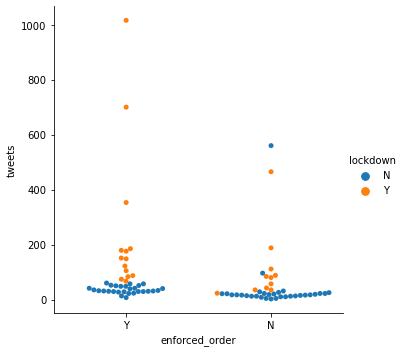

In [140]:
sns.catplot(data=result, x="enforced_order", y="tweets", hue="lockdown", kind="swarm")
plt.show()

This graph shows clear that number of tweets under enforced stay at home order is higher than mild shelter in place order

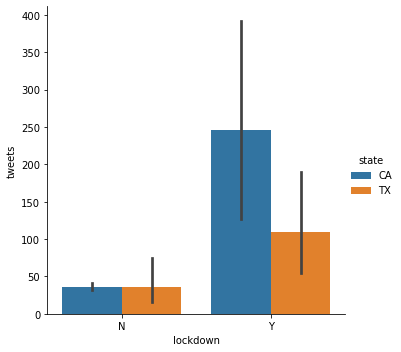

In [139]:
sns.catplot(data=result, x="lockdown", y="tweets", hue="state", kind="bar")

Before lockdown, the number of tweets are similar in CA and TX, while CA's number of tweets is much higher than TX's during lockdown, suggesting a potential variable (enforced stay at home order) may induce this change. Although we hypothese that enforced stay at home order may placy a role here, there are also other possibilities. For example, lots of technology company located in CA, workers in CA may be more eligible to switch to remote work and start tweeting.

My next plan is to implement structural topic modeling to explore more content and hopefully find some labelled emotional dataset to establish emotional classification model.